# Classificador de imagem utilizando Convolutional Neural Networks (CNNs)

## Objetivo
Aplicar os conceitos de Redes de conexões convolucionais aprendidos na lição 8 do *fastai* para identificar se uma imagem é do logo do Flamengo e se não é.

## Autor

- Levi de Oliveira Queiroz 17/0108341
- GitHub: LeviQ27
- Kaggle User: lqueiroz27
- HuggingFace User: L27Queiroz

## Referência

- Lesson 8 *Convolutions (CNNs)*: https://course.fast.ai/Lessons/lesson8.html
- Fastbook Chapter 13: https://github.com/fastai/fastbook/blob/master/13_convolutions.ipynb
- Artigo 1 "Identificar o que é jogo de tiro e jogo de futebol": https://github.com/LeviQ27/fastaiOnCampus/blob/Lesson1_170108341/nbs/lesson01_170108341_LQueiroz27_Levi-de-Oliveira-Queiroz.ipynb
- Kaggle Notebook *Is it a bird? Creating a model from your own data*: https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data
- Fastbook Chapter 4 *Under the Hood: Training a Digit Classifier*: https://github.com/fastai/fastbook/blob/master/04_mnist_basics.ipynb

## Desenvolvimento
Comecei importando os módulos necessários para lidar com CNN na classificação de imagens e baixando as imagens para treinar e validar o modelo.

In [1]:
!pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.2 requires aiofiles<23,>=22.1.0, but you have aiofiles 23.1.0 which is incompatible.


In [2]:
from duckduckgo_search import ddg_images
from fastai.vision.all import *
from fastcore.all import *

def search_images(term, max_images=1500):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Baixando os dados

In [31]:
from fastdownload import download_url 

searches = 'flamengo logo', 'palmeiras logo'
path = Path('time_logo')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o}'))
    sleep(10)
    resize_images(path/o, max_size=2000, dest=path/o)

Searching for 'flamengo logo'
Searching for 'flamengo logo'


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'palmeiras logo'
Searching for 'palmeiras logo'


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [32]:
import os
arquivos = os.listdir(path)
for arquivo in arquivos:
    print(arquivo)

palmeiras logo
flamengo logo


In [33]:
arquivos = os.listdir(path/'palmeiras logo')
print('Palmeiras logo:')
for arquivo in arquivos:
    print(arquivo)

arquivos = os.listdir(path/'flamengo logo')
print('')
print('Flamengo logo:')
for arquivo in arquivos:
    print(arquivo)

Palmeiras logo:
6b2050cc-60e9-4baa-a32b-bb888f228e3c.png
92133c5c-b881-4ba1-99cd-e18d704126d8.jpg
10f99a41-8691-42ae-baea-298c628a63b5.jpg
7d83bcd1-cae0-4d51-bb99-1d65dae9def8.jpg
5f03c113-abe1-4714-9f18-701f2b90dfde.jpg
4b97841e-4065-4ae9-a869-13e93447a190.jpg
6b43e60b-b1c0-4741-9d40-c963a4a20ebc.jpg
68a2e5e1-5d15-40d5-b69d-1adc5e9f5795.jpg
db0d0779-ae83-4c6e-ad97-6f0a704c39dd.png
b794f3ca-ecaa-4f1e-ace9-7f8ddaa577b8.png
db8d55f0-189a-486c-a92e-99e812d8935f.jpg
f700b1cd-94a4-4ca8-b051-bafa3c051349.jpg
99dad988-8ac8-41ce-9917-f2ac93c8b73d.jpg
6a8c1436-6b3e-4966-a0d5-fa6f9119339b.png
c7470356-aa62-4bda-9e17-f7b46b1cd567.jpg
ab24402c-24f5-4f4a-9cd6-d03aa5dc6bdb.png
48a10997-f668-4089-911f-de55d42d93a7.png
af8ba838-010b-49ef-bbd6-97380817404e.png
2d781590-e56e-4ab2-81af-27cf3cbab2ae.jpg
0f693153-2e10-46a8-99f1-76878ab0cd7a.jpg
f7b55f6a-0840-464c-94a2-0abe78c0f9a3.png
329e34a8-fa2e-4d11-8ddf-aef597f2c8f0.jpg
d733021e-a5a3-47fb-9e4e-68cfb166c021.jpg
cae33c84-aee8-4aec-b146-b4811a880ae2.png


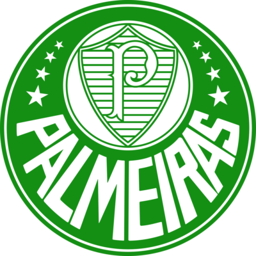

In [80]:
im = Image.open(path/'palmeiras logo/7955c0b6-cc10-4d38-a16e-9a13399fb063.png')
im.to_thumb(256,256)

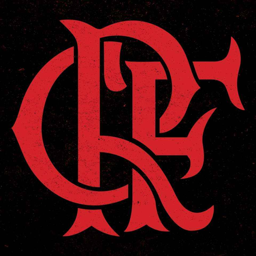

In [81]:
im = Image.open(path/'flamengo logo/7df99b72-264a-4249-a915-8870d7bc4ce5.png')
im.to_thumb(256,256)

In [34]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

### Montando o DataLoaders

In [39]:
def get_dls(bs=64):
    return DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        batch_tfms=Normalize(),
        item_tfms=Resize(250)
    ).dataloaders(path, bs=bs)

dls = get_dls()

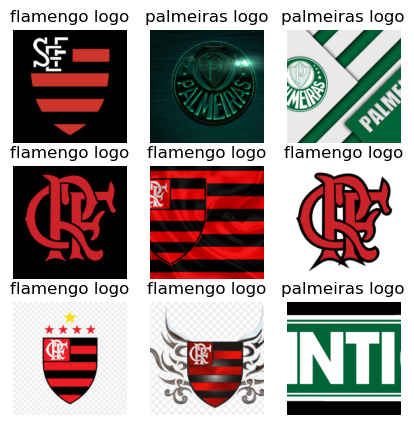

In [40]:
dls.show_batch(max_n=9, figsize=(5,5))

### Treinando o Modelo

In [41]:
from fastai.callback.hook import *

def conv(ni, nf, ks=3, act=True):
    res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

def simple_cnn():
    return nn.Sequential(
        nn.Conv2d(3, 8, kernel_size=5, stride=1, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(8, 16, kernel_size=5, stride=1, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Flatten(),
        nn.Linear(16 * 62 * 62, 128),
        nn.ReLU(),
        nn.Linear(128, dls.c)
    )


def fit(epochs=1):
    learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy,
                    metrics=accuracy, cbs=ActivationStats(with_hist=True))
    learn.fit(epochs, 0.06)
    return learn

learn = fit()

epoch,train_loss,valid_loss,accuracy,time
0,3831.164307,0.699857,0.536723,00:41


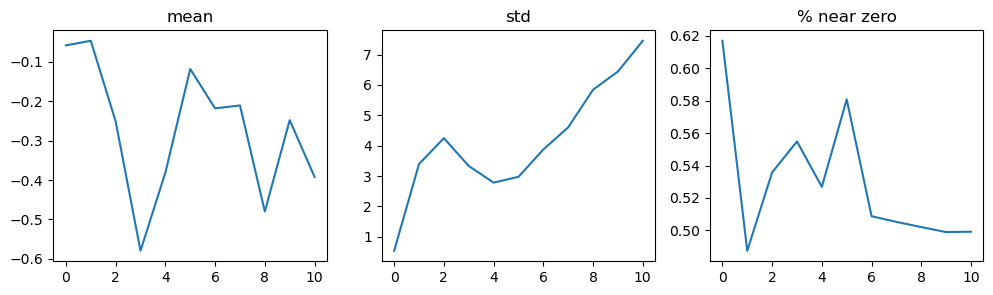

In [42]:
learn.activation_stats.plot_layer_stats(0)

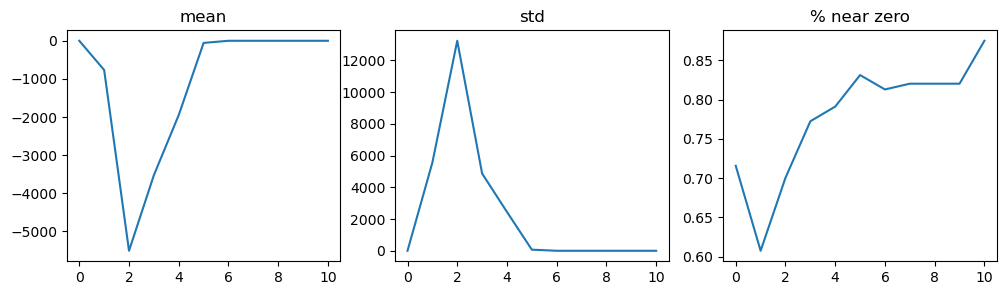

In [43]:
learn.activation_stats.plot_layer_stats(-2)

In [44]:
dls = get_dls(400)

In [45]:
learn = fit()

epoch,train_loss,valid_loss,accuracy,time
0,0.699828,4331.690918,0.463277,00:36


In [46]:
def fit(epochs=1, lr=0.06):
    learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy,
                    metrics=accuracy, cbs=ActivationStats(with_hist=True))
    learn.fit_one_cycle(epochs, lr)
    return learn

In [47]:
learn = fit()

epoch,train_loss,valid_loss,accuracy,time
0,0.679644,0.407967,0.858757,00:37


In [48]:
def conv(ni, nf, ks=3, act=True):
    layers = [nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)]
    if act: layers.append(nn.ReLU())
    layers.append(nn.BatchNorm2d(nf))
    return nn.Sequential(*layers)

In [51]:
learn = fit(5, lr=0.0006)

epoch,train_loss,valid_loss,accuracy,time
0,0.697305,0.640228,0.655367,00:40
1,0.668912,0.243212,0.909605,00:40
2,0.530985,1.824846,0.485876,00:42
3,0.831339,0.270589,0.887006,00:43
4,0.700615,0.091848,0.954802,00:40


## Inferência

In [61]:
urls = search_images('logo flamengo', max_images=1)
urls[0]

Searching for 'logo flamengo'


'https://logodownload.org/wp-content/uploads/2016/09/flamengo-logo-0.png'

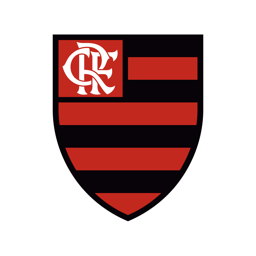

In [62]:
dest = 'flamengo.jpg'
download_url(urls[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

In [63]:
is_flamengo,_,probs = learn.predict(PILImage.create('flamengo.jpg'))
print(f"This is a: {is_flamengo}.")
print(f"Probability it's a flamengo logo: {probs[0]:.4f}")

This is a: ['palmeiras logo', 'flamengo logo'].
Probability it's a flamengo logo: 1.5421


## Conclusão
Como estudado, as convoluções são um tipo de multiplicação matricial com duas limitações no peso da matriz. Essa limitações força um certo padrão na conectividade e permite utilizar poucos parâmetros no modelo sem sacrificar a habilidade de representar recursos visuais complexos, ou seja, posso treinar modelos de deep mais rapidamente com pouco overfitting. Assim apliquei a tecnica de CNN para poder fazer reconhecimento do logo do Flamengo, porém ainda com alguns defeitos pois o tempo para poder realizar o presente artigo, para mim, foi curto e pois está cehgando o fim do semestre com algumas matérias sendo finalizadas no mesmo dia, assim não pude aprofubdar mais na produção de um modelo melhor em CNN.